In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Attribute Information

#### **Input Features**
All the feature values have already been scaled to a similar range so that you won't have to apply feature scaling.

- **Lot No.:** Lot number of the motorcycle. Higher Lot number signifies newer motorcycle.

- **Engine Size:** Size of the eingine of the motorcycle.

- **Mileage:** Measure of how long the motorcycle runs for a litre of gas.

- **KM Run:** Kilometers run on the motorcycle.

- **Max Power:** Maximum power output of the motorcycle.

\

#### **Target Variable**

- **Price:** Resale value of the motorcycle in thousands. Our target variable.


In [4]:
df = pd.read_csv('https://drive.google.com/uc?id=1zeE911284qKNF1q2mgoIgOa4UXYC9N2i')
df.head()

,Lot No.,Engine Size,Mileage,KM Run,Max Power,Price
0,0.056646,-1.043517,0.797331,-0.222694,-1.863743,45.026610
1,0.238778,-0.417864,0.000508,0.866960,-0.312565,39.300833
2,-1.492397,0.936633,0.785432,-0.091035,2.423967,58.923446
3,1.132288,-0.583562,0.790543,1.262054,-1.121522,52.101286
4,1.318906,2.024895,0.996975,1.427730,4.410519,79.322492


In [6]:
df.shape

(500, 6)

In [7]:
df.describe()

,Lot No.,Engine Size,Mileage,KM Run,Max Power,Price
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.028943,-0.098844,0.011978,0.060914,0.290871,49.271645
std,1.016772,0.974530,1.037278,1.013258,1.988121,16.567155
min,-2.983970,-3.051313,-2.570978,-2.720897,-5.797945,0.000000
25%,-0.628825,-0.754901,-0.713869,-0.557405,-1.055721,38.781717
50%,0.044120,-0.145722,0.009085,0.059825,0.203102,49.871182
75%,0.741279,0.595638,0.759851,0.720886,1.687999,59.135314
max,3.625287,2.811878,3.702458,3.173982,6.536713,100.000000


In [8]:
df.corr()

,Lot No.,Engine Size,Mileage,KM Run,Max Power,Price
Lot No.,1.000000,-0.075511,-0.030721,-0.026450,-0.072469,0.394459
Engine Size,-0.075511,1.000000,-0.051029,0.043970,0.989369,0.487538
Mileage,-0.030721,-0.051029,1.000000,-0.066603,-0.045527,0.610832
KM Run,-0.026450,0.043970,-0.066603,1.000000,0.045637,-0.385401
Max Power,-0.072469,0.989369,-0.045527,0.045637,1.000000,0.485464
Price,0.394459,0.487538,0.610832,-0.385401,0.485464,1.000000


In [5]:
X = df.drop('Price', axis = 1)
y = df['Price']


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, median_absolute_error as mae

model = LinearRegression().fit(X, y)
ypred = model.predict(X)
print(mse(y, ypred), mae(y, ypred))

6.537122197504815 1.683778569107865


In [13]:
residuals = ypred - y
residuals

0      4.886867
1      3.594386
2     -2.059584
3      1.396812
4      1.858185
         ...   
495   -1.455648
496    0.211151
497   -0.678169
498    4.007883
499   -4.897724
Name: Price, Length: 500, dtype: float64

Multiple collinearity is a situation where there is a strong linear relationship between two or more predictor variables in a regression model. It occurs when two or more predictor variables are highly correlated with each other.

The significance of multiple collinearity lies in its potential to impact the performance of a regression model. It can lead to increased variance, increased standard errors, and reduced prediction accuracy. Multiple collinearity can make it challenging to estimate the coefficients accurately, interpret their significance, and make reliable predictions. It is therefore important to address multiple collinearity when building regression models to ensure their reliability and validity.

## to remove this::
There are several methods to address multiple collinearity in regression models:

Variance Inflation Factor (VIF): The VIF is a statistical measure that can be used to assess the degree of collinearity among predictor variables. Variables with a high VIF value (typically above 5) indicate high collinearity. By examining the VIF values, you can identify variables that are highly collinear and consider removing them from the model.

Principal Component Regression (PCR): PCR is a technique that reduces the dimensionality of the data by projecting it onto a lower-dimensional space while retaining the most important information. By performing PCR, you can identify the most important variables and remove the less important ones, reducing the collinearity.

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] 
print(VIF)

[1.0087076423300199, 12.616827778300836, 1.0089247045274492, 1.010388194748689, 12.603910494981058]


In [17]:
#This shows that the multicolinearity is a problem and specially on the 4th indexed column

#remove 4th index column from X dataframe
X = X.drop('Max Power', axis = 1)

## check for homoscedasticity

Homoscedasticity refers to the property of a regression model where the variance of the residuals (i.e., the errors) remains constant across different levels of the dependent variable.

The significance of homoscedasticity lies in its impact on the interpretation and estimation of regression coefficients. When the residuals have homoscedasticity, it means that the variance of the errors is constant, regardless of the level of the dependent variable. This property allows for the estimation of the regression coefficients with high accuracy and provides a basis for interpreting the significance of the coefficients.

On the other hand, when the residuals exhibit heteroscedasticity (i.e., non-constant variance), it can make it challenging to estimate the regression coefficients accurately and interpret the significance of the coefficients. Heteroscedasticity can lead to issues such as biased estimates, inflated standard errors, and reduced prediction accuracy. Therefore, it is important to assess the homoscedasticity of the residuals in a regression model to ensure the validity and reliability of the results.

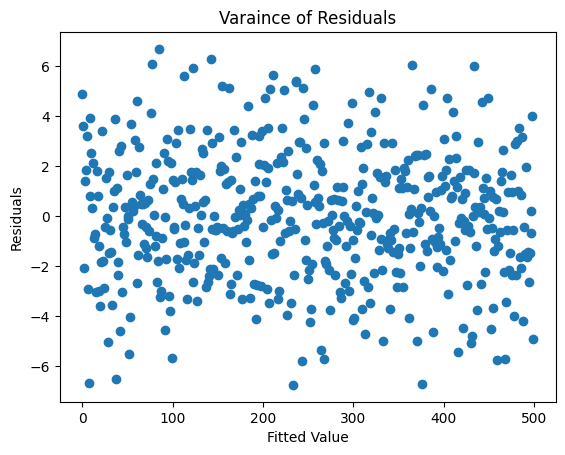

In [18]:
x_ax = range(500)

plt.scatter(x_ax, residuals)
plt.title('Varaince of Residuals')
plt.xlabel('Fitted Value')
plt.ylabel('Residuals')
plt.show()